In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
#from xgboost import XGBRegressor
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split


train = pd.read_csv('/Users/calvin/python/car project/testing_v1.csv')
train_y= train["Price"]
train_x= train.drop(["Price"],axis=1)


print(train_y)
print(train_x)


0       8999
1       6995
2      10000
3      10495
4      13654
5      10995
6      13980
7       9995
8      14950
9      13877
10     18870
11      7995
12     10500
13     11850
14     14688
15     10995
16     11243
17     12995
18     12999
19     13987
20      9481
21     17899
22     14876
23     13995
24     16000
25     13995
26     14495
27     13999
28     10995
29      6999
       ...  
919    32888
920    34995
921    36991
922    18990
923    31950
924    30995
925    36790
926    37995
927    44996
928    49990
929    49975
930    37988
931    39994
932    52988
933    43987
934    55991
935    43990
936    47595
937    59995
938    39988
939    57995
940    55999
941    66995
942    69980
943    67488
944    74950
945    77995
946    77995
947    89900
948    99888
Name: Price, Length: 949, dtype: int64
     Year  Mileage               City State                Vin    Make  \
0    2006    85603    Fort Lauderdale    FL  5GTDN136668200568  HUMMER   
1    2006   116238  

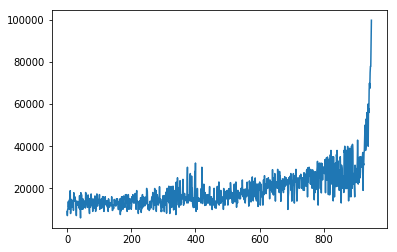

In [7]:
plt.figure(1)
plt.plot(np.arange(len(train["Price"])),train["Price"])

In [9]:
# train_x.dropna(axis=0, how='any')
train=pd.get_dummies(train)
# train_x=pd.get_dummies(test_x)
train.dropna(axis=0, how='any')
print(train)
print(train.shape)

# print(type(train))
# print(train.shape)
# print(train)

     Price  Year  Mileage  City_Abilene  City_Adamsburg  City_Addison  \
0     8999  2006    85603             0               0             0   
1     6995  2006   116238             0               0             0   
2    10000  2006    82277             0               0             0   
3    10495  2007   103093             0               0             0   
4    13654  2009    91608             0               0             0   
5    10995  2007    95703             0               0             0   
6    13980  2007    86076             0               0             0   
7     9995  2006   100356             0               0             0   
8    14950  2008    71030             0               0             0   
9    13877  2008    82915             0               0             0   
10   18870  2009    42597             0               0             0   
11    7995  2006   129499             0               0             0   
12   10500  2008   116614             0            

In [10]:
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.3)

NameError: name 'train_x' is not defined

In [85]:


test=train[train["Year"]==2017]
# print(test)
test_y=test['event count']
test_x=test.drop(columns=["event count"])
test_y.reset_index(drop=True, inplace=True)
test_x.reset_index(drop=True, inplace=True)
test_y=np.array(test_y)
# print(type(test_x))
# print(type(test_y))

train=train.drop(train[train["Year"]==2017].index)
train_y=train['event count']
train_x=train.drop(columns=["event count"])

test_y=test_y.astype(np.int)
train_y=train_y.astype(np.int)
print(train_y)
# test_x, test_y -> testing set
# train_x -> training set & validation set feature
# train_y -> label of training and validation set

KeyError: 'event count'

In [86]:
#seperate the dataset----------------------------------------------------------
#case 1

#training set
# train_x=train_x.values
# train_y=train_y.values
# train_y=train_y.reshape(-1,1)
# test_x=test_x.values
# test_y=test_y.values
# test_y=test_y.reshape(-1,1)

# train_x.dropna(axis=0, how='any')

print(max(train_y))

[10]


In [70]:

# 標準化
scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x=scaler.transform(test_x)


#PCA---------------------------------------------------------------------------
pca_num=0
delta=0.1
pca=PCA(n_components = 0.999999)
train_x=pca.fit_transform(train_x)
test_x=pca.transform(test_x)
print(train_y.shape)
dimension=train_x.shape[1]
print(train_x)
print("train_x.shape=", train_x.shape)
print(test_y)
print(test_x.shape)

(784,)
[[-1.52752523  1.61245155  1.5       ]
 [-1.09108945  1.61245155  1.5       ]
 [-0.65465367  1.61245155  1.5       ]
 ...
 [ 0.65465367 -1.61245155 -1.5       ]
 [ 1.09108945 -1.61245155 -1.5       ]
 [ 1.52752523 -1.61245155 -1.5       ]]
train_x.shape= (784, 3)
[1 0 2 1 1 4 3 4 0 1 0 1 2 5 4 3 1 2 0 2 1 3 4 4 2 2 1 0 1 4 4 3 2 2 1 2 3
 7 9 6 3 2 2 2 3 7 8 6 1 3 2 2 0 3 4 4]
(56, 3)


In [71]:
# print(train_x)
# train.dropna(how="any")
# # print(max(test_y))
# print(np.max(train_x))

train_y=train_y.values
train_y=train_y.reshape(-1,1)  

0.8674284652080843
[[ 1.44828359 -0.26810253 -0.54975879]]
[3.46883642]
y_LR_test = [[-0.06690188]
 [ 0.56518089]
 [ 1.19726367]
 [ 1.82934645]
 [ 2.46142923]
 [ 3.09351201]
 [ 3.72559479]
 [ 4.35767757]
 [ 0.20797751]
 [ 0.84006029]
 [ 1.47214307]
 [ 2.10422585]
 [ 2.73630863]
 [ 3.36839141]
 [ 4.00047419]
 [ 4.63255696]
 [ 0.48285691]
 [ 1.11493969]
 [ 1.74702247]
 [ 2.37910525]
 [ 3.01118803]
 [ 3.6432708 ]
 [ 4.27535358]
 [ 4.90743636]
 [ 0.75773631]
 [ 1.38981909]
 [ 2.02190187]
 [ 2.65398464]
 [ 3.28606742]
 [ 3.9181502 ]
 [ 4.55023298]
 [ 5.18231576]
 [ 1.03261571]
 [ 1.66469848]
 [ 2.29678126]
 [ 2.92886404]
 [ 3.56094682]
 [ 4.1930296 ]
 [ 4.82511238]
 [ 5.45719516]
 [ 1.3074951 ]
 [ 1.93957788]
 [ 2.57166066]
 [ 3.20374344]
 [ 3.83582622]
 [ 4.467909  ]
 [ 5.09999178]
 [ 5.73207455]
 [ 1.5823745 ]
 [ 2.21445728]
 [ 2.84654006]
 [ 3.47862284]
 [ 4.11070562]
 [ 4.74278839]
 [ 5.37487117]
 [ 6.00695395]]
finish, plot the scatter figure


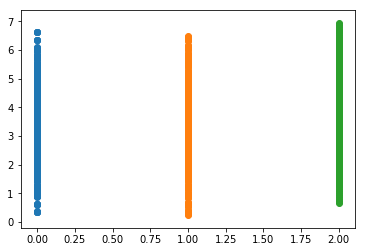

<Figure size 432x288 with 0 Axes>

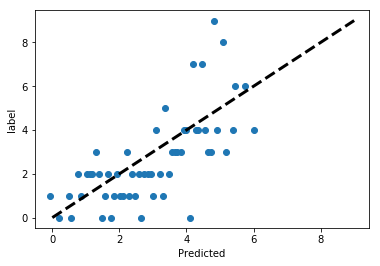

0.8674284652080843
[[ 1.44828359 -0.26810253 -0.54975879]]
[3.46883642]


In [72]:
from sklearn import linear_model
K=3
kf = KFold(n_splits=K)
LR = linear_model.LinearRegression()
i=0
rmse=0
for train_index, test_index in kf.split(train_x):
    LR.fit(train_x[train_index],train_y[train_index])
    y_LR = LR.predict (train_x[test_index])

    plt.scatter(np.ones(y_LR.shape)*i,y_LR)
    i=i+1
    mse=np.mean((np.round(y_LR) != train_y[test_index])**2)
    rmse+=np.sqrt(mse)/K
print(rmse)
print(LR.coef_)
print(LR.intercept_) 




y_LR_test = LR.predict (test_x)
print("y_LR_test =",y_LR_test)
# y_LR_test=np.mean(y_LR_test)
print("finish, plot the scatter figure")
plt.figure(3)
fig, ax = plt.subplots()
ax.scatter(y_LR_test, test_y)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('label')
# plt.xlim((0,10))
# plt.ylim((0,10))

plt.show()   
plt.pause(0.1)
    
print(rmse)
print(LR.coef_)
print(LR.intercept_) 

0.8562278998942887
[[ 1.41810834 -0.26737217 -0.57823547]]
[3.47437492]


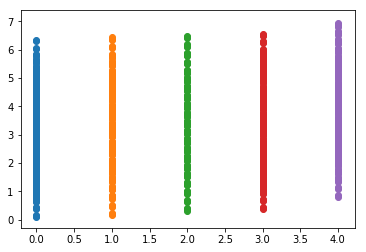

In [73]:
#Linear Regression
from sklearn import linear_model
K=5
kf = KFold(n_splits=K)
LR = linear_model.LinearRegression()
i=0
rmse=0

for train_index, test_index in kf.split(train_x):
    LR.fit(train_x[train_index],train_y[train_index])
    y_LR = LR.predict (train_x[test_index])

    plt.scatter(np.ones(y_LR.shape)*i,y_LR)
    i=i+1
    mse=np.mean((np.round(y_LR) != train_y[test_index])**2)
    rmse+=np.sqrt(mse)/K
print(rmse)
print(LR.coef_)
print(LR.intercept_) 

y_LR_test = [[-0.05662609]
 [ 0.56228713]
 [ 1.18120035]
 [ 1.80011357]
 [ 2.41902679]
 [ 3.03794001]
 [ 3.65685322]
 [ 4.27576644]
 [ 0.23249164]
 [ 0.85140486]
 [ 1.47031808]
 [ 2.0892313 ]
 [ 2.70814452]
 [ 3.32705774]
 [ 3.94597096]
 [ 4.56488418]
 [ 0.52160938]
 [ 1.1405226 ]
 [ 1.75943582]
 [ 2.37834903]
 [ 2.99726225]
 [ 3.61617547]
 [ 4.23508869]
 [ 4.85400191]
 [ 0.81072711]
 [ 1.42964033]
 [ 2.04855355]
 [ 2.66746677]
 [ 3.28637999]
 [ 3.90529321]
 [ 4.52420642]
 [ 5.14311964]
 [ 1.09984484]
 [ 1.71875806]
 [ 2.33767128]
 [ 2.9565845 ]
 [ 3.57549772]
 [ 4.19441094]
 [ 4.81332416]
 [ 5.43223738]
 [ 1.38896258]
 [ 2.0078758 ]
 [ 2.62678902]
 [ 3.24570223]
 [ 3.86461545]
 [ 4.48352867]
 [ 5.10244189]
 [ 5.72135511]
 [ 1.67808031]
 [ 2.29699353]
 [ 2.91590675]
 [ 3.53481997]
 [ 4.15373319]
 [ 4.77264641]
 [ 5.39155962]
 [ 6.01047284]]
finish, plot the scatter figure


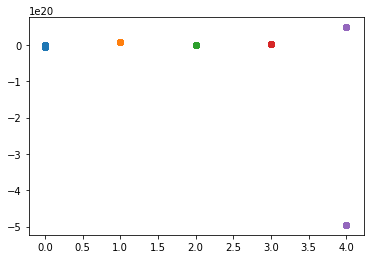

<Figure size 432x288 with 0 Axes>

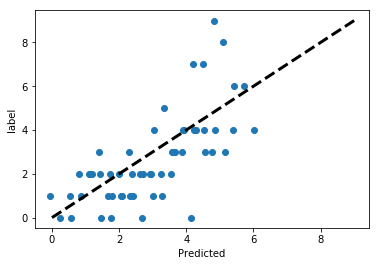

[[-1.27091826e-113 -1.28008634e-114  1.14025833e-113 ...  3.37018761e-060
  -1.09673990e-054  8.52654884e-051]]
[4.8476874e+19]
1.0
0.001


In [77]:
#kernel Ridge
degree=6
i=0
train_x_copy=train_x
for power in range(2,degree+1):
    i=i+1
    train_x=np.concatenate((train_x, np.power(train_x_copy,power)),axis=1) 

#kernelridge
from sklearn.linear_model import RidgeCV
K=5
kf = KFold(n_splits=K)
RR = RidgeCV(alphas=np.logspace(-3, 3, 100))
i=0
rmse=0
for train_index, test_index in kf.split(train_x):
    RR.fit(train_x[train_index],train_y[train_index])
    y_RR = RR.predict(train_x[test_index])

    plt.scatter(np.ones(y_RR.shape)*i,y_RR)
    i=i+1
    mse=np.mean((np.round(y_RR) != train_y[test_index])**2)
    rmse+=np.sqrt(mse)/K
    
y_RR = LR.predict (test_x)
print("y_LR_test =",y_RR)
# y_LR_test=np.mean(y_LR_test)
print("finish, plot the scatter figure")
plt.figure(3)
fig, ax = plt.subplots()
ax.scatter(y_RR, test_y)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('label')
# plt.xlim((0,10))
# plt.ylim((0,10))

plt.show()   
plt.pause(0.1)
print(RR.coef_)
print(RR.intercept_)
print(rmse)
print(RR.alpha_)

In [57]:
# #kernel
# degree=3
# i=0
# train_x_copy=train_x
# for power in range(2,degree+1):
#     i=i+1
#     train_x=np.concatenate((train_x, np.power(train_x_copy,power)),axis=1) 

# #kernelridge
# from sklearn.linear_model import RidgeCV
# K=5
# kf = KFold(n_splits=K)
# RR = RidgeCV(alphas=np.logspace(-3, 3, 100))
# i=0
# rmse=0
# for train_index, test_index in kf.split(train_x):
#     RR.fit(train_x[train_index],train_y[train_index])
#     y_RR = RR.predict(train_x[test_index])

#     plt.scatter(np.ones(y_RR.shape)*i,y_RR)
#     i=i+1
#     mse=np.mean((np.round(y_RR) != train_y[test_index])**2)
#     rmse+=np.sqrt(mse)/K
# print(RR.coef_)
# print(RR.intercept_)
# print(rmse)
# print(RR.alpha_)

In [58]:
# y_RR = LR.predict (test_x)
# print("y_LR_test =",y_RR)

# print("finish, plot the scatter figure")
# plt.figure(3)
# fig, ax = plt.subplots()
# ax.scatter(y_RR, test_y)
# ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
# ax.set_xlabel('Predicted')
# ax.set_ylabel('label')